In [57]:
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [58]:
trainDF = pd.read_csv('train.csv')
trainDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [59]:
testDF = pd.read_csv('test.csv')
testDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [60]:
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, DF):
        if 'label' in DF.columns:
            self.x = DF.drop(columns=['label']).values
            self.y = pd.get_dummies(DF['label']).values
        else:
            self.x = DF.values
        pass

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        x=torch.FloatTensor(self.x[idx].reshape(1,28,28))

        if hasattr(self,'y'):
            y=torch.FloatTensor(self.y[idx])
            return x,y
        else:
            return x

trainSet= MyDataset(DF=trainDF)
testSet= MyDataset(DF=testDF)
trainSet[0][1]

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [61]:
trainLoader= torch.utils.data.DataLoader(trainSet,batch_size=2048)
testLoader = torch.utils.data.DataLoader(testSet)
trainLoader

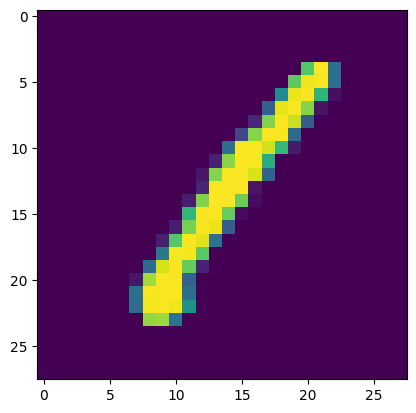

In [62]:
# get some random training images
dataiter = iter(trainLoader)
images, labels = next(dataiter)

# show images
plt.imshow(images[0][0])

In [63]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = torch.nn.Conv2d(1, 1, 3)
        self.pool = torch.nn.MaxPool2d(2, 2)
        self.fc1 = torch.nn.Linear(25, 25)
        self.fc2 = torch.nn.Linear(25, 10)

    def forward(self, x):
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = self.pool(torch.nn.functional.relu(self.conv1(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Net()

model = Net().to(device)
print(model)

Using mps device
Net(
  (conv1): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=10, bias=True)
)


In [64]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters())

In [65]:
def trainAI(dataloader, model, loss_fn, optimizer):
    model.train()
    totalLoss=0
    for  X, y in dataloader:
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        totalLoss +=loss.item()

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        totalLoss+=loss.item()
    print(totalLoss)
    return totalLoss

14.490341544151306
14.479129374027252
14.467913925647736
14.456846594810486
14.445770978927612
14.43481969833374
14.423827588558197
14.412956297397614
14.402290225028992
14.391514718532562
14.380785524845123
14.370180130004883
14.359679579734802
14.349183440208435
14.338886559009552
14.32865560054779
14.318360567092896
14.308275818824768
14.298280894756317
14.288329184055328
14.278320133686066
14.268368065357208
14.258512437343597
14.248670816421509
14.238887667655945
14.229064702987671
14.219291925430298
14.209554374217987
14.200047969818115
14.190367758274078
14.180835783481598
14.171295940876007
14.161832213401794
14.152275621891022
14.142830193042755
14.133388996124268
14.124179065227509
14.11478328704834
14.105598390102386
14.096437513828278
14.087322235107422
14.078269600868225
14.069246172904968
14.060145199298859
14.051164388656616
14.04228276014328
14.03336763381958
14.024509370326996
14.01551216840744
14.006689548492432
13.998078763484955
13.989431142807007
13.980858266353607

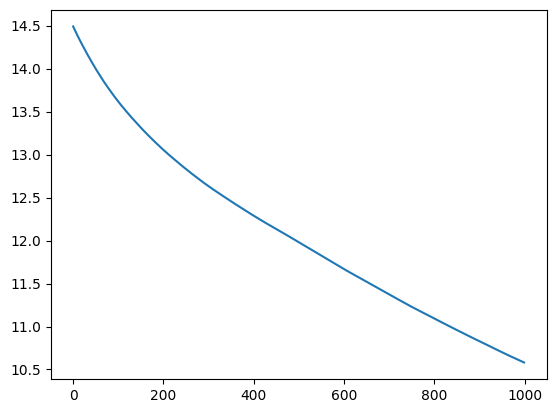

In [73]:
epochs = 1000 
totalLoss=[]
for t in range(epochs):
    totalLoss.append(trainAI(trainLoader, model, loss_fn, optimizer))
print("Done!")

plt.plot(totalLoss)

In [74]:
def testAI(dataloader, model ):
    model.eval()
    out = []
    y=1
    with torch.no_grad():
        for X in dataloader:
            X  = X.to(device)
            pred = model(X)
            out.append([y, torch.argmax(pred).item()])
            y+=1
    return out
result = testAI(testLoader, model )
result

[[1, 2],
 [2, 0],
 [3, 8],
 [4, 7],
 [5, 2],
 [6, 7],
 [7, 0],
 [8, 3],
 [9, 0],
 [10, 3],
 [11, 5],
 [12, 7],
 [13, 4],
 [14, 0],
 [15, 4],
 [16, 5],
 [17, 3],
 [18, 1],
 [19, 9],
 [20, 0],
 [21, 9],
 [22, 1],
 [23, 1],
 [24, 5],
 [25, 7],
 [26, 4],
 [27, 2],
 [28, 7],
 [29, 7],
 [30, 7],
 [31, 7],
 [32, 5],
 [33, 4],
 [34, 2],
 [35, 6],
 [36, 2],
 [37, 0],
 [38, 5],
 [39, 1],
 [40, 6],
 [41, 7],
 [42, 7],
 [43, 4],
 [44, 9],
 [45, 8],
 [46, 7],
 [47, 8],
 [48, 8],
 [49, 6],
 [50, 8],
 [51, 6],
 [52, 8],
 [53, 8],
 [54, 3],
 [55, 8],
 [56, 2],
 [57, 1],
 [58, 8],
 [59, 4],
 [60, 0],
 [61, 4],
 [62, 1],
 [63, 7],
 [64, 0],
 [65, 0],
 [66, 0],
 [67, 1],
 [68, 9],
 [69, 0],
 [70, 1],
 [71, 6],
 [72, 5],
 [73, 8],
 [74, 8],
 [75, 2],
 [76, 8],
 [77, 3],
 [78, 9],
 [79, 2],
 [80, 3],
 [81, 5],
 [82, 7],
 [83, 1],
 [84, 0],
 [85, 9],
 [86, 2],
 [87, 4],
 [88, 3],
 [89, 6],
 [90, 7],
 [91, 2],
 [92, 0],
 [93, 6],
 [94, 6],
 [95, 1],
 [96, 4],
 [97, 3],
 [98, 9],
 [99, 7],
 [100, 4],
 [101, 0

In [75]:
result = pd.DataFrame(result)
result = result.astype(int)
result.columns=['ImageId','Label']
result

,ImageId,Label
0,1,2
1,2,0
2,3,8
3,4,7
4,5,2
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [76]:
result.to_csv('result.csv',index=False)